# Credit score

In [26]:
import pandas as pd
import numpy as np
%config Completer.use_jedi = False\


In [2]:
Bank_data=pd.read_csv('C:/Varun/Ineuron/End_End_projects/classification/Bank/bank_data.csv')

In [3]:
Bank_data.head()

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,Good,1,1,0,1,0,0,0,1,0
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,Good,1,1,0,1,0,0,0,1,0
2,5636,3392,March,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,Good,1,1,0,1,0,0,0,1,0
3,5637,3392,April,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,Good,1,1,0,1,0,0,0,1,0
4,5638,3392,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,Good,1,1,0,1,0,0,0,1,0


In [4]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87865 entries, 0 to 87864
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        87865 non-null  int64  
 1   Customer_ID               87865 non-null  int64  
 2   Month                     87865 non-null  object 
 3   Name                      79092 non-null  object 
 4   Age                       87865 non-null  int64  
 5   Occupation                87865 non-null  object 
 6   Annual_Income             87865 non-null  float64
 7   Monthly_Inhand_Salary     87865 non-null  float64
 8   Num_Bank_Accounts         87865 non-null  int64  
 9   Num_Credit_Card           87865 non-null  int64  
 10  Interest_Rate             87865 non-null  int64  
 11  Num_of_Loan               87865 non-null  int64  
 12  Delay_from_due_date       87865 non-null  int64  
 13  Num_of_Delayed_Payment    87865 non-null  float64
 14  Change

In [6]:
#checking null vales in data
Bank_data.isnull().sum() #we can see only Name has missing values and we can remove that column

ID                             0
Customer_ID                    0
Month                          0
Name                        8773
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
Auto Loan                      0
Credit-Builder Loan            0
Debt Consolidation Loan        0
Home Equity Loan               0
Mortgage L

In [7]:
Bank_data.describe()

,ID,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
count,87865.000000,87865.000000,87865.000000,87865.000000,87865.000000,87865.000000,87865.000000,87865.000000,87865.000000,87865.000000,...,87865.000000,87865.000000,87865.000000,87865.000000,87865.000000,87865.000000,87865.000000,87865.000000,87865.000000,87865.000000
mean,80607.277369,25956.348580,33.237023,48209.979386,4007.091518,5.435395,5.565128,14.718420,3.567939,21.344802,...,394.502209,0.308155,0.320116,0.312582,0.315757,0.317271,0.432140,0.322233,0.313515,0.312741
std,43294.040662,14330.397362,10.757675,35249.178037,2932.342748,2.571976,2.062501,8.744835,2.453595,14.889109,...,202.676455,0.461733,0.466524,0.463548,0.464819,0.465416,0.495376,0.467334,0.463924,0.463613
min,5634.000000,1006.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,...,0.007760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43101.000000,13660.000000,24.000000,19181.270000,1612.487500,4.000000,4.000000,8.000000,2.000000,10.000000,...,268.835542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80649.000000,25765.000000,33.000000,36217.700000,3031.413333,6.000000,5.000000,14.000000,3.000000,18.000000,...,334.369632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,118088.000000,38326.000000,42.000000,69363.870000,5770.522500,7.000000,7.000000,20.000000,5.000000,28.000000,...,462.466979,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,155629.000000,50999.000000,56.000000,164861.360000,13485.456667,11.000000,11.000000,34.000000,9.000000,67.000000,...,1459.930653,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Checking non-integer columns
Bank_data.describe(exclude=np.number)

,Month,Name,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,87865,79092,87865,87865,87865,87865,87865
unique,8,10020,15,3,3,6,3
top,January,Stevex,Lawyer,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,11047,39,6268,41301,47077,24350,47003


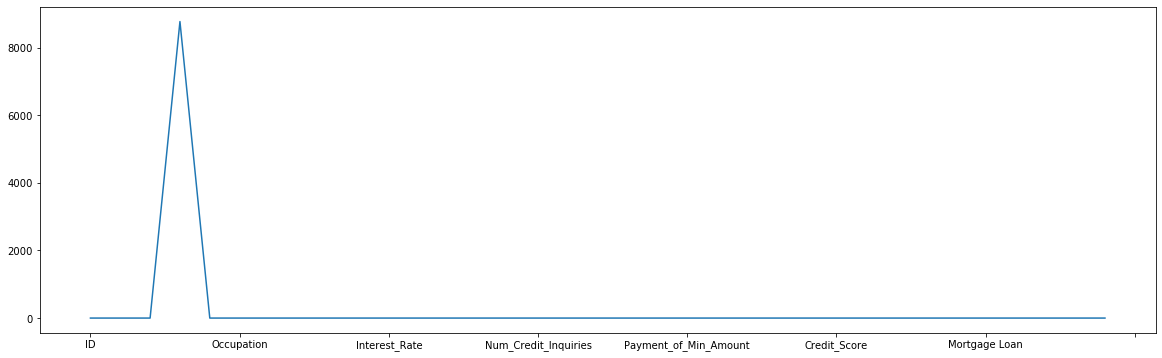

In [21]:
Bank_data.isnull().sum().plot(figsize=(20,6))

In [39]:

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

<Figure size 1080x432 with 0 Axes>

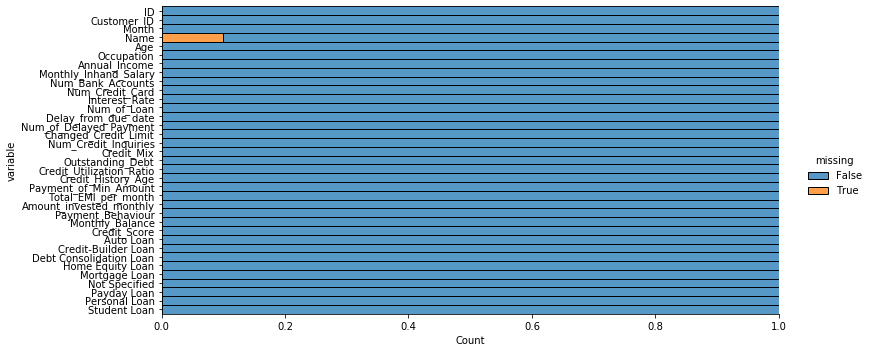

In [42]:
#Checking missing values in all columns
plt.figure(figsize=(15,6))
sns.displot(
    data=Bank_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
#deleting columns which are not required (ID, Customer ID, Month, Name)

In [47]:
Bank=Bank_data.drop(['ID','Customer_ID','Month',"Name"],axis=1)

In [54]:
Bank.shape

(87865, 31)

In [60]:
#One hot encoding for all catagorical variables
#first findout what are catogorical variables. Else write function to find dtype=object and do one hot encoding.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [61]:
for x in Bank.select_dtypes(np.object).columns:
    Bank[x]=label_encoder.fit_transform(Bank[x])
    plt.show()

In [62]:
Bank

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,23,12,19114.12,1824.843333,3,4,3,4,3,7.0,...,0,1,1,0,1,0,0,0,1,0
1,23,12,19114.12,1824.843333,3,4,3,4,-1,4.0,...,0,1,1,0,1,0,0,0,1,0
2,23,12,19114.12,1824.843333,3,4,3,4,3,7.0,...,0,1,1,0,1,0,0,0,1,0
3,23,12,19114.12,1824.843333,3,4,3,4,5,4.0,...,0,1,1,0,1,0,0,0,1,0
4,23,12,19114.12,1824.843333,3,4,3,4,6,4.0,...,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87860,25,9,39628.99,3359.415833,4,6,7,2,23,7.0,...,1,1,0,0,0,0,0,0,0,1
87861,25,9,39628.99,3359.415833,4,6,7,2,18,7.0,...,1,1,0,0,0,0,0,0,0,1
87862,25,9,39628.99,3359.415833,4,6,7,2,27,6.0,...,1,1,0,0,0,0,0,0,0,1
87863,25,9,39628.99,3359.415833,4,6,7,2,20,6.0,...,2,1,0,0,0,0,0,0,0,1


In [ ]:
#plot distirbution charts for all variables

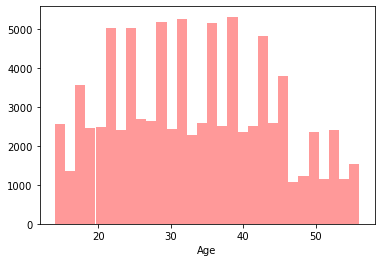

In [73]:
sns.distplot(Bank['Age'], kde = False, color ='red', bins = 30)

C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


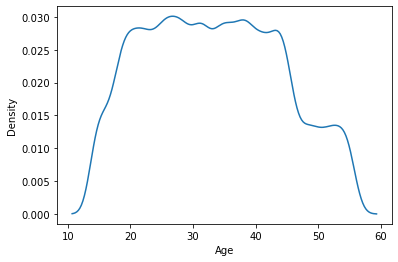

In [81]:
sns.kdeplot(Bank['Age'])

C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


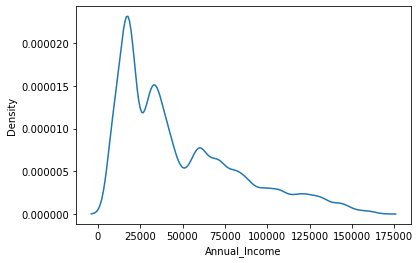

In [84]:
sns.kdeplot(Bank['Annual_Income'])

C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


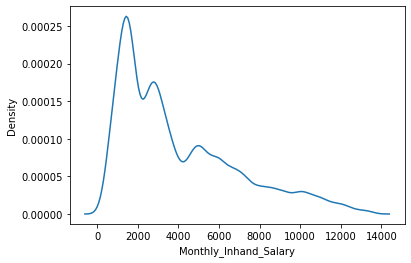

In [85]:
sns.kdeplot(Bank['Monthly_Inhand_Salary'])

C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


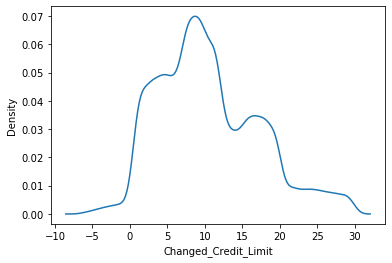

In [86]:
sns.kdeplot(Bank['Changed_Credit_Limit'])

C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


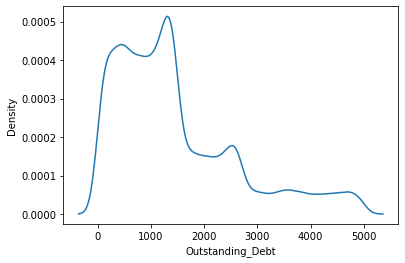

In [87]:
sns.kdeplot(Bank['Outstanding_Debt'])

C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


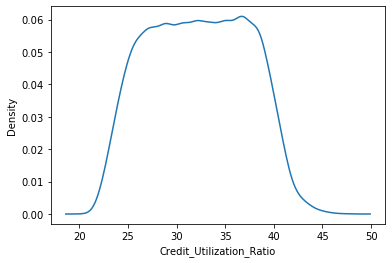

In [88]:
sns.kdeplot(Bank['Credit_Utilization_Ratio'])

C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


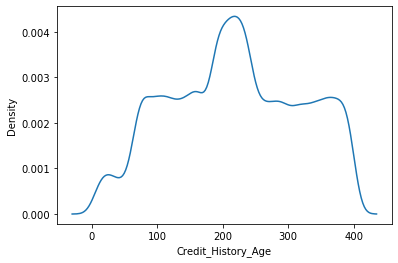

In [89]:
sns.kdeplot(Bank['Credit_History_Age'])

C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


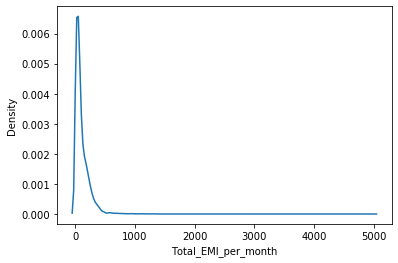

In [90]:
sns.kdeplot(Bank['Total_EMI_per_month'])

C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


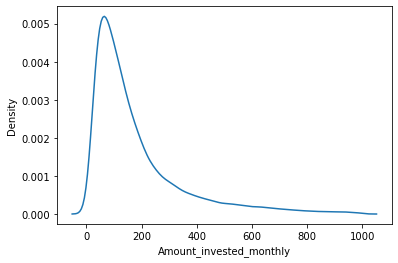

In [91]:
sns.kdeplot(Bank['Amount_invested_monthly'])

C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


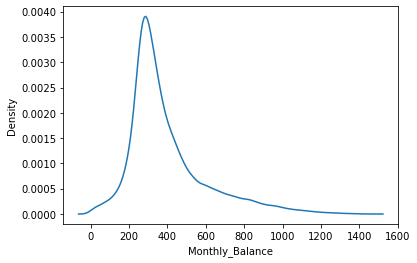

In [103]:
sns.kdeplot(Bank['Monthly_Balance'])

C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\varun\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\varun\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the on

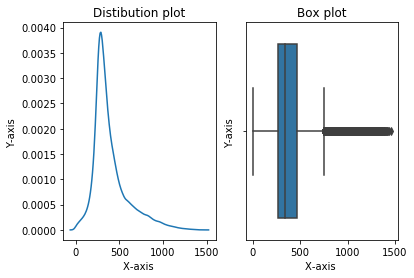

In [113]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.kdeplot(Bank['Monthly_Balance'])
plt.title("Distibution plot")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')


plt.subplot(1, 2, 2) # index 2
sns.boxplot(Bank['Monthly_Balance'])
plt.title("Box plot")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.show()

C:\Users\varun\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


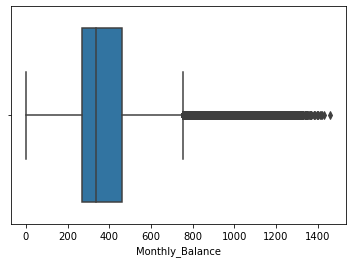

In [115]:
sns.boxplot(Bank['Monthly_Balance'])

In [116]:
Bank.corr()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
Age,1.000000,-0.003803,0.088043,0.087202,-0.189048,-0.146879,-0.217313,-0.212209,-0.171615,-0.179540,...,-0.056775,-0.083645,-0.079249,-0.089129,-0.076683,-0.085451,-0.026875,-0.079616,-0.098738,-0.077463
Occupation,-0.003803,1.000000,0.005776,0.005310,0.011168,0.001896,0.004596,-0.004756,0.006749,-0.007231,...,0.006326,0.005287,0.003273,-0.001926,-0.009122,-0.009847,-0.012277,0.000908,-0.009550,0.004370
Annual_Income,0.088043,0.005776,1.000000,0.997902,-0.254238,-0.203215,-0.280079,-0.242413,-0.228637,-0.247176,...,-0.054512,-0.095647,-0.111915,-0.104022,-0.092800,-0.087299,-0.004643,-0.092665,-0.100945,-0.090600
Monthly_Inhand_Salary,0.087202,0.005310,0.997902,1.000000,-0.253313,-0.202084,-0.279642,-0.241073,-0.228005,-0.246250,...,-0.052606,-0.095074,-0.110650,-0.104121,-0.091991,-0.086786,-0.004894,-0.092900,-0.099429,-0.090007
Num_Bank_Accounts,-0.189048,0.011168,-0.254238,-0.253313,1.000000,0.439401,0.577907,0.467373,0.555023,0.580492,...,0.167913,0.183558,0.191665,0.170359,0.183340,0.195609,0.048836,0.185367,0.188948,0.159577
Num_Credit_Card,-0.146879,0.001896,-0.203215,-0.202084,0.439401,1.000000,0.495154,0.415168,0.476450,0.412519,...,0.103427,0.160365,0.167188,0.150883,0.154202,0.168336,0.057446,0.167287,0.158535,0.155195
Interest_Rate,-0.217313,0.004596,-0.280079,-0.279642,0.577907,0.495154,1.000000,0.554926,0.584543,0.552962,...,0.111254,0.225154,0.224769,0.208144,0.222497,0.222115,0.055912,0.218284,0.211013,0.211475
Num_of_Loan,-0.212209,-0.004756,-0.242413,-0.241073,0.467373,0.415168,0.554926,1.000000,0.497130,0.460961,...,0.056378,0.389901,0.406471,0.383342,0.401839,0.401418,0.043002,0.402256,0.393614,0.383900
Delay_from_due_date,-0.171615,0.006749,-0.228637,-0.228005,0.555023,0.476450,0.584543,0.497130,1.000000,0.524747,...,0.086213,0.188588,0.183921,0.194988,0.194292,0.193736,0.052833,0.195462,0.194843,0.186782
Num_of_Delayed_Payment,-0.179540,-0.007231,-0.247176,-0.246250,0.580492,0.412519,0.552962,0.460961,0.524747,1.000000,...,0.186797,0.188254,0.199519,0.161641,0.184436,0.186303,0.038899,0.173556,0.174468,0.175518


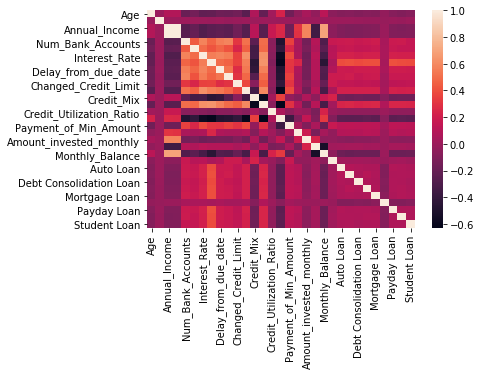

In [119]:
sns.heatmap(Bank.corr())

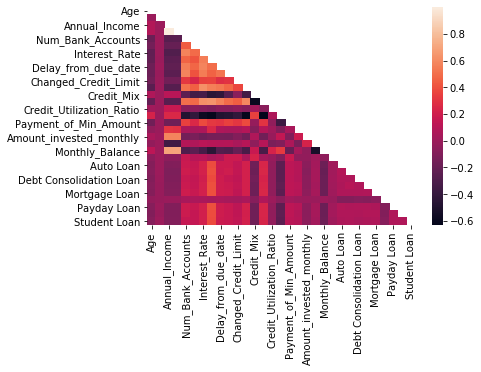

In [123]:
mask = np.triu(np.ones_like(Bank.corr()))
sns.heatmap(Bank.corr(),mask=mask)

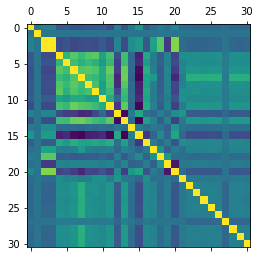

In [124]:
plt.matshow(Bank.corr())

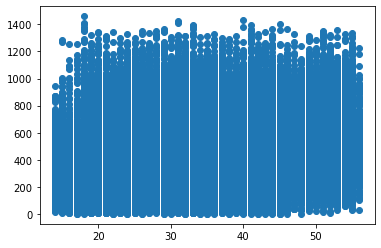

In [139]:
plt.scatter(Bank['Age'], Bank['Monthly_Balance'])
plt.show()

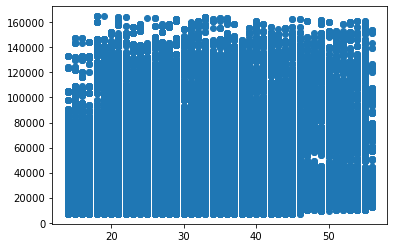

In [138]:
plt.scatter(Bank['Age'], Bank['Annual_Income'])
plt.show()

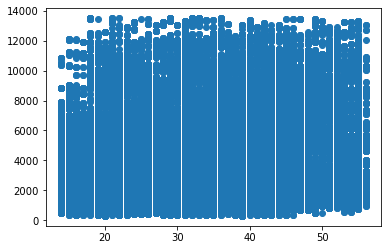

In [137]:
plt.scatter(Bank['Age'], Bank['Monthly_Inhand_Salary'])
plt.show()

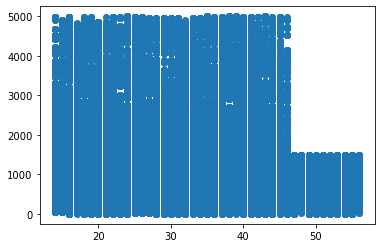

In [136]:
plt.scatter(Bank['Age'], Bank['Outstanding_Debt'])
plt.show()

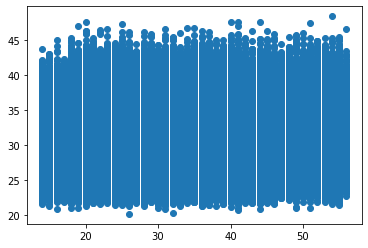

In [131]:
plt.scatter(Bank['Age'], Bank['Credit_Utilization_Ratio'])
plt.show()

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [141]:
Bank.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')

In [142]:
y=Bank['Credit_Score']

In [144]:
X=Bank.drop(['Credit_Score'],axis=1)

In [145]:
X.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,23,12,19114.12,1824.843333,3,4,3,4,3,7.0,...,312.494089,1,1,0,1,0,0,0,1,0
1,23,12,19114.12,1824.843333,3,4,3,4,-1,4.0,...,284.629162,1,1,0,1,0,0,0,1,0
2,23,12,19114.12,1824.843333,3,4,3,4,3,7.0,...,331.209863,1,1,0,1,0,0,0,1,0
3,23,12,19114.12,1824.843333,3,4,3,4,5,4.0,...,223.451310,1,1,0,1,0,0,0,1,0
4,23,12,19114.12,1824.843333,3,4,3,4,6,4.0,...,341.489231,1,1,0,1,0,0,0,1,0


In [147]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=43)

In [151]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((61505, 30), (26360, 30), (61505,), (26360,))

In [152]:
#creating logisticRegression model
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [153]:
# predict class labels for the train set. The predict fuction converts probability values > .5 to 1 else 0
y_pred = model.predict(X_test)

In [154]:
y_pred

array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

In [159]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [160]:
confusion = confusion_matrix(y_pred,y_test)

In [161]:
confusion

array([[ 1798,   306,  1164],
       [   84,  4052,  2046],
       [ 2617,  3312, 10981]], dtype=int64)

In [162]:
from sklearn.metrics import classification_report

In [163]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.55      0.40      0.46      4499
          1       0.66      0.53      0.59      7670
          2       0.65      0.77      0.71     14191

avg / total       0.63      0.64      0.63     26360



In [164]:
#Not so good model, however we are trying build end-end model based on this model.
#letstry Decission tree

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
DT = tree.DecisionTreeClassifier()

In [168]:
DTS=DT.fit(X_train, y_train)

In [170]:
DTy_pred = DTS.predict(X_test)

In [171]:
DT_confusion = confusion_matrix(DTy_pred,y_test)

In [173]:
DT_confusion

array([[ 3009,   122,  1433],
       [  118,  5503,  2079],
       [ 1372,  2045, 10679]], dtype=int64)

In [174]:
print(classification_report(y_test,DTy_pred))

             precision    recall  f1-score   support

          0       0.66      0.67      0.66      4499
          1       0.71      0.72      0.72      7670
          2       0.76      0.75      0.76     14191

avg / total       0.73      0.73      0.73     26360



In [175]:
#Decission tree is performing best compare to logistic regress.
#Now we will save Decission tree and try to create end-end model
#Save pickle file

In [176]:
import pickle

In [178]:
pickle.dump(DTS,open('DTmodel.pkl','wb')) #file will be saved in homepage of Jupyter notebook

In [179]:
pickled_model=pickle.load(open('DTmodel.pkl','rb')) # we can load any pickle file also

In [187]:
testing=X_test[0:1] #testing pickle file

In [189]:
pickled_model.predict(testing)

array([2], dtype=int64)